In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
import random
import os
import shutil
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d, cKDTree
from sklearn.metrics import silhouette_score
from collections import Counter

os.getcwd()
matplotlib.rc('font', family='SimHei', weight='light')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Times New Roman', weight='light')
bar_width = 0.3
font1 = 20
font2 = 24
markerSize = 15
labelSize = 15
shadow = 0.3
bar_alpha = 0.8
italic_font = FontProperties(style='italic')
error_bar_properties = {
    'capsize': 5,  # Width of the caps at the ends of error bars
    'elinewidth': 1.5,  # Width of the error bar lines
    'ecolor': 'black',  # Color of the error bars
}


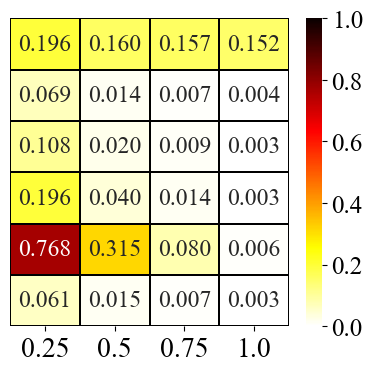

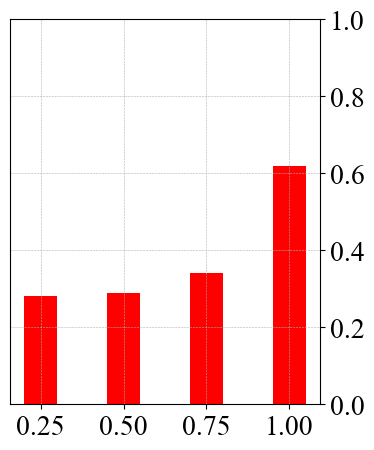

In [3]:
basic_path = './output_results/Basic.csv'
basic_data = pd.read_csv(basic_path)

times = [6, 12, 24]
avails = [0.25, 0.5, 0.75, 1.0]
betas = [0, 0.25, 0.5, 0.75, 1]

# Avail vs. beta
yticks = betas
xticks = avails
travel_data = []
queue_data = []
waiting_data = []
overall_data = []
unfairness_data = []
energy_data = []
for beta in betas:
    data_array = basic_data[f't=12,b={beta}'].to_numpy()
    travel_data.append(data_array[:4])
    queue_data.append(data_array[4:8])
    waiting_data.append(data_array[8:12])
    overall_data.append(data_array[12:16])
    unfairness_data.append(data_array[16:20])
    energy_data.append(data_array[20:24])
travel_data.append(basic_data['t=12,Recommend'].to_numpy()[:4])
queue_data.append(basic_data['t=12,Recommend'].to_numpy()[4:8])
waiting_data.append(basic_data['t=12,Recommend'].to_numpy()[8:12])
overall_data.append(basic_data['t=12,Recommend'].to_numpy()[12:16])
unfairness_data.append(basic_data['t=12,Recommend'].to_numpy()[16:20])
energy_data.append(basic_data['t=12,Recommend'].to_numpy()[20:24])

heatmap_data = waiting_data
fig1, ax1 = plt.subplots(figsize=(4.5, 4))
sns_plot = sns.heatmap(heatmap_data,
                       cmap=plt.cm.hot_r,
                       linewidths=.05,
                       linecolor='black',
                       annot=True,
                       fmt='.3f',
                       ax=ax1,
                       annot_kws={"size": 17},
                       vmin=0,
                       vmax=1,
                       yticklabels=[],
                       xticklabels=xticks)
cbar = sns_plot.collections[0].colorbar
cbar.ax.tick_params(labelsize=18) 
# cbar.set_label("Value", size=font2)
# plt.xlabel('Probability of available charging slots', fontsize=font2)
# plt.ylabel('Charging behavior value', fontsize=font1)
plt.yticks(rotation=360, fontsize=font1)
plt.xticks(fontsize=font1)
plt.savefig('output_results/Heatmap_wait.pdf', dpi=300, bbox_inches='tight')
plt.show()

x = [0.25, 0.5, 0.75, 1.0]
y = [0.28, 0.29, 0.34, 0.62]

ax = plt.subplot()
ax.bar(x, y, width=0.1, color='r')
ax.figure.set_size_inches(4, 5)
ax.yaxis.tick_right()
# ax.set_xlabel("Ratio of available charging slots", fontsize=font2+2)
# ax.set_ylabel('Mean recommended behavior value', fontsize=font2)
plt.ylim(0, 1)
plt.yticks(fontsize=font1)
plt.xticks(x, fontsize=font1)
plt.grid(linestyle='--', linewidth=0.4)
out_path = 'output_results/Behavior_slots.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

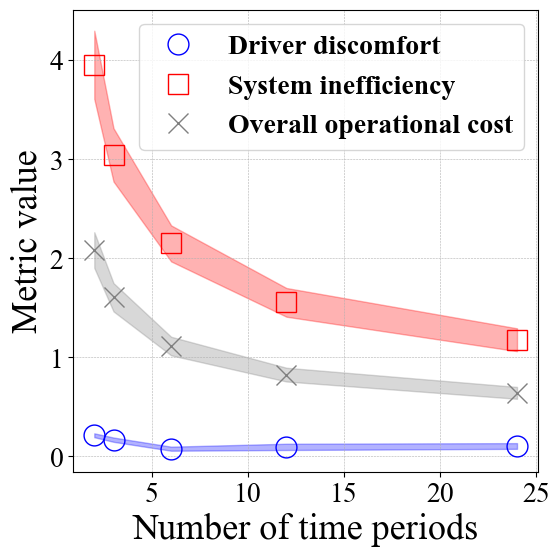

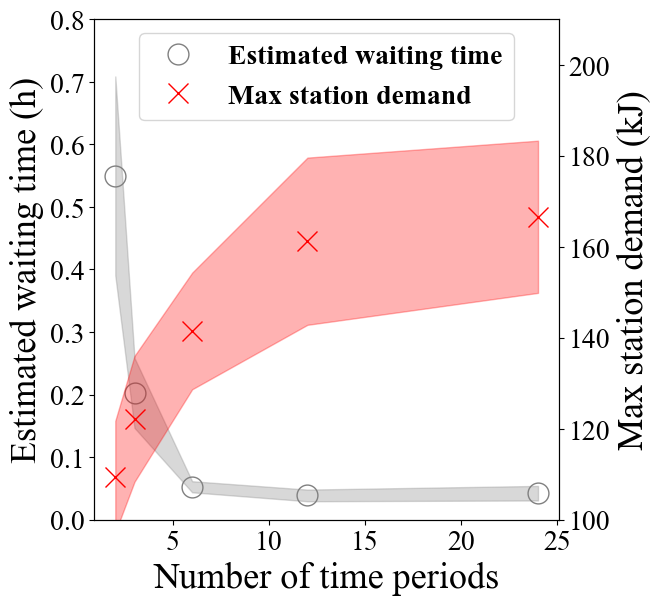

In [28]:
data = pd.read_csv('./output_results/Time.csv')
x = np.array([2, 3, 6, 12, 24])


d = data['discomfort'].to_numpy()
i = data['inefficiency'].to_numpy()
o = data['overall'].to_numpy() / 2
u = data['unfairness'].to_numpy()

t = data['travel'].to_numpy()
q = data['queue'].to_numpy()
w = data['wait'].to_numpy()
e = data['energy'].to_numpy()

plt.yticks(fontsize=font1)
plt.xticks(fontsize=font1)
ax = plt.subplot()
ax.plot(x, d[:5], marker='o', markersize=markerSize, markerfacecolor='none', linestyle='None', color='b', label="Driver discomfort")
ax.fill_between(x, d[:5] - d[5:]/2, d[:5] + d[5:]/2, alpha=shadow, color='b')
ax.plot(x, i[:5], marker='s', markersize=markerSize, markerfacecolor='none', linestyle='None', color='r', label="System inefficiency")
ax.fill_between(x, i[:5] - i[5:]/2, i[:5] + i[5:]/2, alpha=shadow, color='r')
ax.plot(x, o[:5], marker='x', markersize=markerSize, linestyle='None', color='grey', label="Overall operational cost")
ax.fill_between(x, o[:5] - o[5:]/2, o[:5] + o[5:]/2, alpha=shadow, color='grey')
ax.figure.set_size_inches(6, 6)
ax.set_xlabel("Number of time periods", fontsize=font2+2)
ax.set_ylabel('Metric value', fontsize=font2+2)
plt.grid(linestyle='--', linewidth=0.4)
plt.legend(loc='upper right', prop={'weight': 'bold', 'size': font1})
out_path = 'output_results/Time_metrics.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

plt.yticks(fontsize=font1)
plt.xticks(fontsize=font1)
ax1 = plt.subplot()
ax1.figure.set_size_inches(6, 6.5)
ax1.plot(x, w[:5], marker='o', markersize=markerSize, markerfacecolor='none', linestyle='None', color='grey', label="Estimated waiting time")
ax1.fill_between(x, w[:5] - w[5:]/2, w[:5] + w[5:]/2, alpha=shadow, color='grey')
ax1.set_ylim(0, 0.8)
ax1.set_ylabel('Estimated waiting time (h)', fontsize=font2+2)
ax2 = ax1.twinx()
ax2.plot(x, e[:5], marker='x', markersize=markerSize, linestyle='None', color='r', label="Max station demand")
ax2.fill_between(x, e[:5] - e[5:]/2, e[:5] + e[5:]/2, alpha=shadow, color='r')
ax2.set_ylabel('Max station demand (kJ)', fontsize=font2+2)
ax2.tick_params(axis='y', labelsize=font1)
ax2.set_ylim(100, 210)
# ax1.set_xticks(x)
ax1.set_xlabel("Number of time periods", fontsize=font2+2)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', prop={'weight': 'bold', 'size': font1})
out_path = 'output_results/Time_metrics2.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

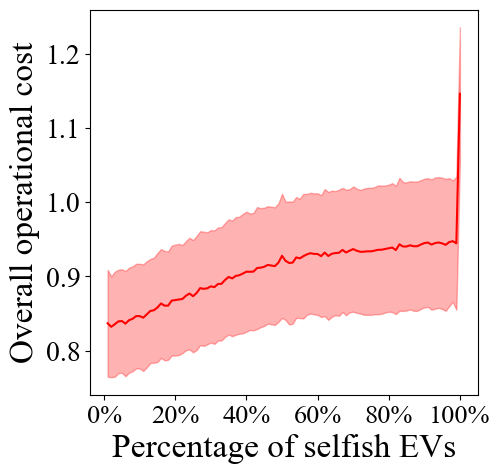

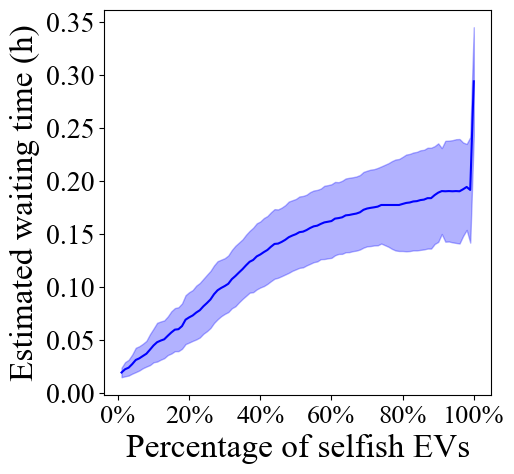

In [16]:
data = pd.read_csv("output_results/Adversary.csv")
x = np.linspace(1, 100, 100)

plt.yticks(fontsize=font1)
plt.xticks(fontsize=font1-1)
ax = plt.subplot()
ax.plot(x, data['overall'], linestyle='-', color='r')
ax.fill_between(x, data['overall'] - data['o_std']/2, data['overall'] + data['o_std']/2, alpha=shadow, color='r')
ax.figure.set_size_inches(5, 5)
# ax.set_ylim(0, 2)
ax.set_xticks(ticks=[0, 20, 40, 60, 80, 100], labels=['0%', '20%', '40%', '60%', '80%', '100%'])
ax.set_xlabel('Percentage of selfish EVs', fontsize=font2)
ax.set_ylabel('Overall operational cost', fontsize=font2)
plt.savefig('output_results/Misbehaved_overall.pdf', dpi=300, bbox_inches='tight')
plt.show()

plt.yticks(fontsize=font1)
plt.xticks(fontsize=font1-1)
ax = plt.subplot()
ax.plot(x, data['waiting'], linestyle='-', color='b')
ax.fill_between(x, data['waiting'] - data['w_std']/2, data['waiting'] + data['w_std']/2, alpha=shadow, color='b')
ax.figure.set_size_inches(5, 5)
# ax.set_ylim(0, 0.4)
ax.set_xticks(ticks=[0, 20, 40, 60, 80, 100], labels=['0%', '20%', '40%', '60%', '80%', '100%'])
ax.set_xlabel('Percentage of selfish EVs', fontsize=font2)
ax.set_ylabel('Estimated waiting time (h)', fontsize=font2)
plt.savefig('output_results/Misbehaved_wait.pdf', dpi=300, bbox_inches='tight')
plt.show()


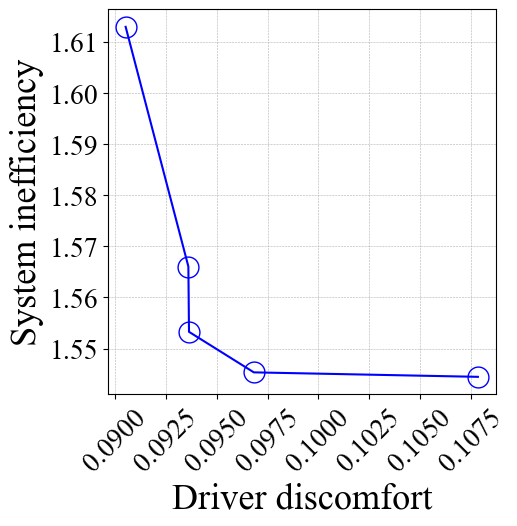

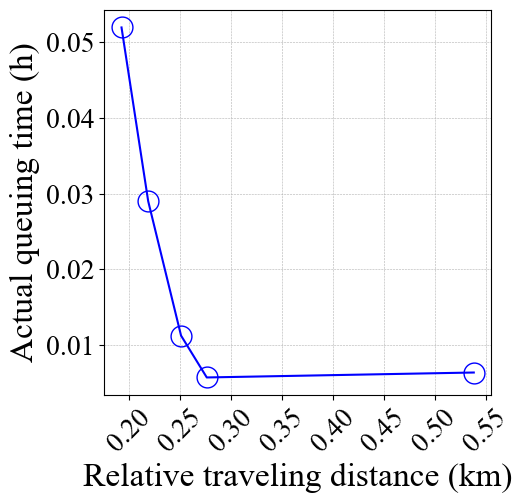

In [22]:
data_path = 'output_results/Beta.csv'
data = pd.read_csv(data_path)
beta = [0.1, 0.25, 0.5, 0.75, 0.9]

x = data['discomfort']
y = data['inefficiency']
plt.yticks(fontsize=font1)
plt.xticks(fontsize=font1, rotation=45)
ax = plt.subplot()
ax.plot(x, y, marker='o', markersize=markerSize, markerfacecolor='none', linestyle='-', color='b')
ax.figure.set_size_inches(5, 5)
ax.set_xlabel("Driver discomfort", fontsize=font2+2)
ax.set_ylabel('System inefficiency', fontsize=font2+2)
plt.grid(linestyle='--', linewidth=0.4)
out_path = 'output_results/pareto_cost.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

plt.yticks(fontsize=font1)
plt.xticks(fontsize=font1, rotation=45)
ax = plt.subplot()
ax.plot(data['travel'], data['queue'], marker='o', markersize=markerSize, markerfacecolor='none', linestyle='-', color='b')
ax.figure.set_size_inches(5, 5)
ax.set_xlabel("Relative traveling distance (km)", fontsize=font2)
ax.set_ylabel('Actual queuing time (h)', fontsize=font2)
plt.grid(linestyle='--', linewidth=0.4)
out_path = 'output_results/pareto_real.pdf'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()